# Importing Libraries

In [2]:
from functions.adversarial import *
from functions.classification import *
from functions.dip.DIP import *
import cv2
import numpy as np
from utils import *
import matplotlib.pyplot as plt

# Adding noise to the adversarial examples

This will test whether adding __normal random noise__ to the adversarial examples can revert them back to the original classification.

We will loop over some values of epsilon, $[1, 5, 10, 25, 50, 100]$, for each method and a range for the noise standard deviation of $[1,2,...,128]$, ensuring we clip the adversarial examples such that the range of the final result is within $[0,256]$.

We will observe how the confidence of the correct class changes.

## Fast Gradient Sign Method

In [2]:
Averages = np.zeros([128,6])
Pi = np.ones(3)

eps_values = [1]#, 5, 10, 25, 50, 100]
for i in range(1):
    value = eps_values[i]
    adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=value, show=False)
    P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
    original_class = R[0,0]
    
    for j in range(128):
        std = (j+1)
        print('Epsilon: {}   Std: {}'.format(value , std), end="\r")
        for k in range(3):
            adv_noisy = adv + std*np.random.randn(224,224,3)
            adv_noisy = np.clip(adv_noisy,0,255).astype(np.uint8)
            P, R = classification(adv_noisy, model_name = 'resnet18', sort = False, show = False)
            Pi[k] = P[0,original_class]
        Averages[j,i] = np.average(Pi)

### Plotting

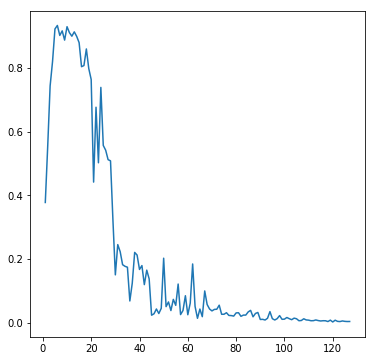

In [6]:
#np.savetxt('FGSM.txt', Averages)

t = np.arange(1, 128, 1)
eps_values = [1, 5, 10, 25, 50, 100]
for i in range(1):
    #plt.close()
    fig = plt.figure(1, figsize=(6, 6))
    plt.plot(t,Averages[0:127,i])
    plt.show()
    #fig.savefig('results/Adv_rev_noise/FGSM_Eps{}png'.format(eps_values[i]))

plt.close()
#fig = plt.figure(figsize=(30, 30))
#for i in range(6):
#    fig.add_subplot(1, 6, i)
#    plt.plot(t,Averages[0:127,i])
#plt.show()

### Plotting samples from FGSM

In [13]:
Samples = np.zeros([128,5])
eps_values = [1, 5, 10, 25, 50, 100]

for i in range(6):
    eps_value = eps_values[i]
    adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=eps_value, show=False)
    P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
    original_class = R[0,0]
    
    for j in range(128):
        std = (j+1)
        print('Epsilon: {}   Std: {}'.format(value , std), end="\r")
        
        for k in range(5):
            adv_noisy = adv + std*np.random.randn(224,224,3)
            adv_noisy = np.clip(adv_noisy,0,255).astype(np.uint8)
            P, R = classification(adv_noisy, model_name = 'resnet18', sort = False, show = False)
            Samples[j,k] = P[0,original_class]
            
    np.savetxt('results/Adv_rev_noise/FGSM_eps{}.txt'.format(eps_value), Samples)


## Least Likely Class Iterative method

In [4]:
Averages = np.zeros([128,6])
Pi = np.ones(3)

eps_values = [1, 5, 10, 25, 50, 100]
for i in range(6):
    value = eps_values[i]
    adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=value, show=False)
    P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
    original_class = R[0,0]
    
    for j in range(128):
        std = (j+1)
        print('Epsilon: {}   Std: {}'.format(value , std), end="\r")
        for k in range(3):
            adv_noisy = adv + std*np.random.randn(224,224,3)
            P, R = classification(adv_noisy, model_name = 'resnet18', sort = False, show = False)
            Pi[k] = P[0,original_class]
        Averages[j,i] = np.average(Pi)

### Plotting

In [ ]:
np.savetxt('FGSM.txt', Averages)

t = np.arange(1, 128, 1)
eps_values = [1, 5, 10, 25, 50, 100]
for i in range(6):
    plt.close()
    fig = plt.figure(1, figsize=(6, 6))
    plt.plot(t,Averages[0:127,i])
    fig.savefig('results/Adv_rev_noise/FGSM_Eps{}png'.format(eps_values[i]))

plt.close()
fig = plt.figure(figsize=(30, 30))
for i in range(6):
    fig.add_subplot(1, 6, i)
    plt.plot(t,Averages[0:127,i])
plt.show()

### Plotting samples from LLCI

In [3]:
Samples = np.zeros([128,5])
eps_values = [1, 5, 10, 25, 50, 100]

for i in range(6):
    eps_value = eps_values[i]
    adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=eps_value, show=False)
    P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
    original_class = R[0,0]
    
    for j in range(128):
        std = (j+1)
        print('Epsilon: {}   Std: {}'.format(eps_value , std), end="\r")
        
        for k in range(5):
            adv_noisy = adv + std*np.random.randn(224,224,3)
            adv_noisy = np.clip(adv_noisy,0,255).astype(np.uint8)
            P, R = classification(adv_noisy, model_name = 'resnet18', sort = False, show = False)
            Samples[j,k] = P[0,original_class]
            
    np.savetxt('results/Adv_rev_noise/LLCI_eps{}.txt'.format(eps_value), Samples)

## Plotting samples  from BI

In [3]:
Samples = np.zeros([128,5])
eps_values = [1, 5, 10, 25, 50, 100]

for i in range(6):
    eps_value = eps_values[i]
    adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='BI',eps=eps_value, show=False)
    P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
    original_class = R[0,0]
    
    for j in range(128):
        std = (j+1)
        print('Epsilon: {}   Std: {:>3}'.format(eps_value , std), end="\r")
        
        for k in range(5):
            adv_noisy = adv + std*np.random.randn(224,224,3)
            adv_noisy = np.clip(adv_noisy,0,255).astype(np.uint8)
            P, R = classification(adv_noisy, model_name = 'resnet18', sort = False, show = False)
            Samples[j,k] = P[0,original_class]
            
    np.savetxt('results/Adv_rev_noise/BI_eps{}.txt'.format(eps_value), Samples)

## Observing effects of adding  noise to the original image

In [7]:
Samples = np.zeros([128,5])
orig = cv2.imread('data/goldfish.jpg')[..., ::-1]
orig = cv2.resize(orig, (224, 224))
for j in range(128):
    std = (j+1)
    print('Std: {:>3}'.format(std), end="\r")

    for k in range(5):
        orig_noisy = orig + std*np.random.randn(224,224,3)
        orig_noisy = np.clip(orig_noisy,0,255).astype(np.uint8)
        P, R = classification(orig_noisy, model_name = 'resnet18 ', sort = False, show = False)
        Samples[j,k] = P[0,original_class]

np.savetxt('results/Adv_rev_noise/orig_noisy_RN50.txt', Samples)